In [14]:
%matplotlib inline
import scipy as scp
import numpy as np       # the NumPy library for fast matrix and vector data types and math operations
import matplotlib.pyplot as plt   # functions for plotting, loaded under a convenient name alias 'plt'
import xarray as xr      # matrix and vector containers with labeled axes, used for signals
import holoviews as hv   # a different plotting web-based library mainly for interactive display
import hvplot.xarray     # xaray wrappers for holoviews
import xrscipy           # additional SciPy xarray-compatible wrappers
import xrscipy.signal as dsp    # subpackage convenience: functions for digital signal processing of signals
import xrrandom          # for random sammpling parametrized by xarray objects
import cdb_extras.xarray_support as cdbxr  # a convenient Python library for accessing the COMPASS database
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import scipy.signal
from sklearn.linear_model import LinearRegression

In [3]:
shot1 = cdbxr.Shot(17269)
list(filter(lambda k: 'APD' in k, shot1.keys()))

['APD.light_profile',
 'APD.light_profile_time_axis',
 'APD.density_profile_time_axis',
 'APD.density_profile',
 'APD',
 'APD.time_axis',
 'APD.R_axis']

In [4]:
APD1 = shot1["APD.light_profile"]
APD1

<xarray.DataArray 'APD.light_profile' (time: 14000, R: 18)>
array([[  5.451872,   7.95933 ,  17.313509, ...,   2.060338,   2.509199,
          3.805058],
       [  0.104278, -35.790554,  -6.346402, ...,  -0.8838  ,  -0.62851 ,
         -2.72223 ],
       [  2.778075,  20.459305,   1.04732 , ...,   1.165916,   0.99845 ,
          0.717827],
       ...,
       [  2.778075, -42.040543,  11.398531, ...,  -0.101182,  -2.023047,
         -1.487338],
       [  2.778075,  92.33423 ,  -7.085745, ...,  -0.101182,   0.18497 ,
         -2.722231],
       [ -2.569519, -57.66548 ,  19.161924, ...,   1.240451,  -1.364516,
          2.129133]], dtype=float32)
Coordinates:
  * time     (time) float64 1.06e+03 1.06e+03 1.06e+03 ... 1.13e+03 1.13e+03
  * R        (R) float64 0.6036 0.6133 0.6229 0.6326 ... 0.7483 0.758 0.7676
Attributes:
    record_number:  17269
    revision:       1
    timestamp:      2018-06-15 15:42:35
    data_quality:   UNKNOWN
    units:          V
    description:    Light profi

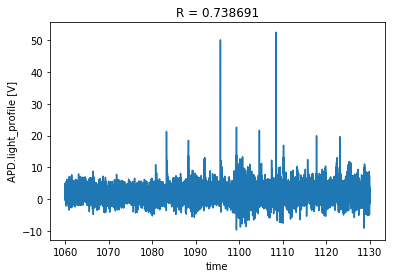

In [5]:
APD1[:,14].plot()

In [6]:
mat = scipy.io.loadmat('17269_Li_ELMs.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Aug 30 13:32:07 2022',
 '__version__': '1.0',
 '__globals__': [],
 'None': MatlabOpaque([(b'cdb', b'MCOS', b'cdb_client', array([[3707764736],
        [         2],
        [         1],
        [         1],
        [         1],
        [         1]], dtype=uint32))],
              dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]),
 'A': array([[1074.80801305, 1074.92351306],
        [1083.25501345, 1083.55101347],
        [1088.29451369, 1088.72451371],
        [1091.98301387, 1092.25251388],
        [1095.84451405, 1096.06501406],
        [1099.33501422, 1099.79251424],
        [1102.37401436, 1102.57251437],
        [1105.01801449, 1105.3630145 ],
        [1107.4215146 , 1107.60401461],
        [1110.13301473, 1110.55301475],
        [1113.29101488, 1113.48251489],
        [1115.69301499, 1116.06501501],
        [1117.76751509, 1118.0055151 ],
        [1119.74951519, 1119.9440152 ],
        [1122.1

In [7]:
shot1["APD.R_axis"]

<xarray.DataArray 'APD.R_axis' (APD.R_axis: 11)>
array([0.671169, 0.680815, 0.690461, 0.700107, 0.709753, 0.719399, 0.729045,
       0.738691, 0.748337, 0.757983, 0.767629])
Coordinates:
  * APD.R_axis  (APD.R_axis) float64 0.6712 0.6808 0.6905 ... 0.758 0.7676
Attributes:
    record_number:  17269
    revision:       3
    timestamp:      2018-06-15 23:00:29
    data_quality:   UNKNOWN
    units:          V
    description:    Radial position of midplane (z=0) points in view of the A...

In [8]:
ELM1=APD1[:,14].sel(time=slice(1125.16, 1125.67))
ELM1

<xarray.DataArray 'APD.light_profile' (time: 102)>
array([ 9.426772,  8.36377 ,  5.316498,  3.473961, 11.411042,  0.781023,
        7.088168,  0.355822,  2.83616 ,  4.324363,  6.450366,  4.040896,
        6.733834,  3.828295,  6.166899,  3.26136 ,  4.395229,  2.765293,
        1.560557,  0.922756,  5.954298,  1.206224,  2.340093,  4.111763,
        7.938569,  1.277091, 11.836244, -1.203247,  8.859838,  4.466096,
        4.678696,  1.347957,  3.899162,  5.103897,  1.844024,  8.57637 ,
        9.355906,  0.781023,  4.182629,  2.269225,  6.592101,  0.710156,
        7.442502,  4.253496,  3.615695,  2.19836 , 10.064574,  3.899162,
        5.670834,  7.442502,  7.300768,  4.182629,  7.655103,  4.39523 ,
        1.702291,  6.096033,  8.859838,  3.403095, 11.552777,  6.733834,
        6.1669  ,  2.269226,  5.103898,  4.395229,  4.749564,  1.064489,
        1.914891,  0.568423,  3.757429,  3.26136 ,  6.308633,  2.198359,
       11.623644,  3.828296,  7.371634,  6.8047  ,  2.623559,  2.977893,


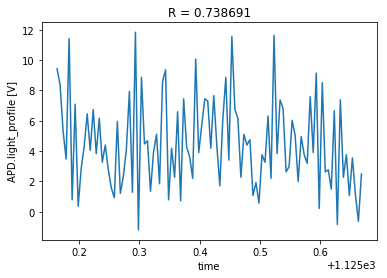

In [9]:
ELM1.plot()

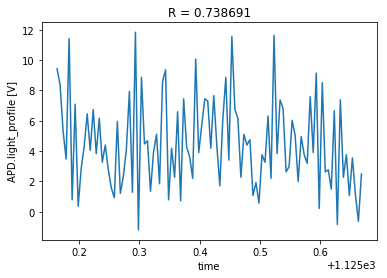

In [10]:
APD1[:,14].sel(time=slice(1125.16, 1125.67)).plot()

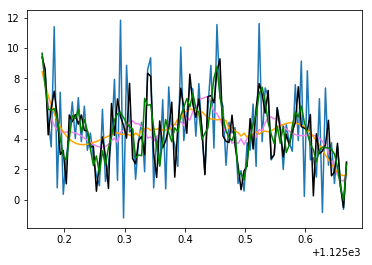

In [11]:
y = ELM1.values
x = ELM1.time.values
yhat1 = scipy.signal.savgol_filter(y, 25, 5)
yhat2 = scipy.signal.savgol_filter(y, 43, 7)
yhat3 = scipy.signal.savgol_filter(y, 51 , 5)
yhat4 = scipy.signal.savgol_filter(y, 11 , 8)
yhat5 = scipy.signal.savgol_filter(y, 17 , 8)
np.set_printoptions(precision=2)

plt.figure()
plt.plot(x,y)
#plt.plot(x,yhata, color='red', label = 'less smooth')
plt.plot(x,yhat2, color='violet')
plt.plot(x, yhat3, color='orange')
plt.plot(x, yhat4, color='black')
plt.plot(x, yhat5, color='green')
#plt.legend()

In [12]:
regr1 = sm.OLS(y, yhat1).fit()
print(regr1.aic)
regr2 = sm.OLS(y, yhat2).fit()
print(regr2.aic)
regr3 = sm.OLS(y, yhat3).fit()
print(regr3.aic)
regr4 = sm.OLS(y, yhat4).fit()
print(regr4.aic)
regr5 = sm.OLS(y, yhat5).fit()
print(regr5.aic)

484.9695893687727
494.07019577253595
498.1720927005357
474.6681611676146
471.15105860553285


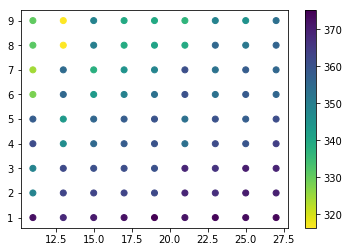

[11. 11. 11. 11. 11. 11. 11. 11. 11. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 19. 19. 19. 19. 19. 19. 19. 19. 19. 21. 21. 21. 21. 21. 21. 21. 21. 21.
 23. 23. 23. 23. 23. 23. 23. 23. 23. 25. 25. 25. 25. 25. 25. 25. 25. 25.
 27. 27. 27. 27. 27. 27. 27. 27. 27.]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[372.7  348.88 348.89 361.78 358.04 328.26 324.42 331.31 330.68 368.41
 363.17 361.86 346.44 343.67 355.54 354.82 316.31 316.38 370.83 363.
 360.78 355.29 355.91 343.31 338.15 349.94 348.93 372.59 363.08 361.31
 357.97 358.12 349.19 344.92 339.23 339.66 375.17 362.17 360.55 360.1
 360.15 353.41 348.33 340.92 339.7  372.36 369.09 369.14 353.74 353.78
 360.39 360.97 339.38 336.91 374.33 367.14 366.59 361.63 360.23 353.19
 35

In [31]:
window = [11,13,15,17,19,21,23,25,27]
order = [1,2,3,4,5,6,7,8,9]

n_order = len(order)
n_window = len(window)
AIC_num = np.zeros(n_window * n_order)

size = ELM1.sizes['time']-1
y = ELM1.values[np.argmax(ELM1.values):size]
x = ELM1.time.values[np.argmax(ELM1.values):size]

for i in range(n_window):
    for j in range(n_order):
        yhat = scipy.signal.savgol_filter(y, window[i], order[j])
        #AIC_num[n_order*i+j] = aic(y, yhat, order[j])
        AIC_num[n_order*i+j] = sm.OLS(y, yhat).fit().aic
        if(window[i]==11 and order[j]==10):
            plt.plot(x,y)
            plt.plot(x,yhat+.08)
            plt.show()
            
yPlot = order.copy()
for i in range(n_window-1):
    yPlot.extend(order)

xPlot = np.zeros(n_window * n_order)
for i in range(n_window):
    for j in range(n_order):
        xPlot[n_order*i+j] = window[i]

scatter = plt.scatter(xPlot, yPlot, c = AIC_num, cmap='viridis_r')
plt.colorbar()
plt.show()

print(xPlot)
print(yPlot)
print(AIC_num)

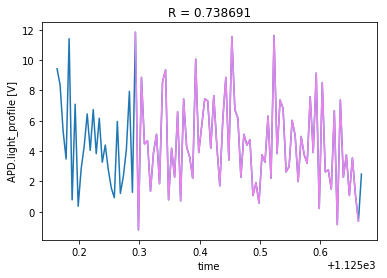

In [24]:
ELM1.plot()
yhat6 = scipy.signal.savgol_filter(y, 11, 10)
plt.plot(x, yhat6, color='violet')

In [23]:
regr6 = sm.OLS(y, yhat6).fit()
print(regr6.aic)

-inf
